In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
dataset=pd.read_csv("HousingData.csv")


In [3]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NA,36.2
5,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NA,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [4]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    str    
 1    ZN       506 non-null    str    
 2    INDUS    506 non-null    str    
 3    CHAS     506 non-null    str    
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    str    
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    str    
 13   MEDV     506 non-null    float64
dtypes: float64(6), int64(2), str(6)
memory usage: 55.5 KB


In [5]:
dataset.columns = dataset.columns.str.strip()
dataset=dataset.dropna(subset=["CHAS"])

In [6]:
dataset.describe()

,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,356.674032,22.532806
std,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,91.294864,9.197104
min,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000
25%,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,375.377500,17.025000
50%,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,391.440000,21.200000
75%,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,396.225000,25.000000
max,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


In [7]:
dataset.isnull().any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [8]:
dataset=dataset.fillna(dataset, inplace=True)

In [9]:
dataset.columns = dataset.columns.str.strip()


In [10]:
money=dataset.groupby("CHAS")['MEDV'].mean().reset_index().sort_values("MEDV",ascending=True)
money



,CHAS,MEDV
3,NA,18.810526
1,0,22.215044
0,,22.900000
2,1,28.826471


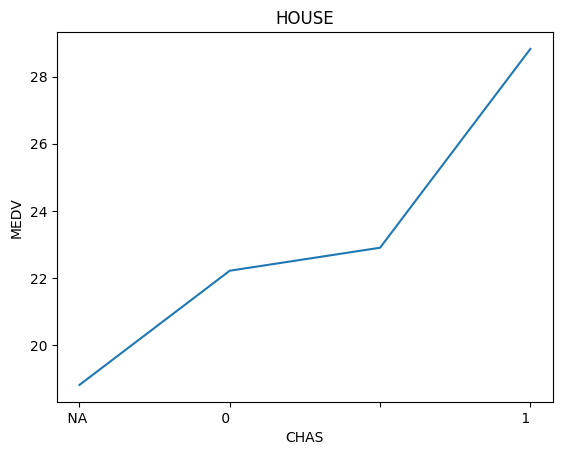

In [11]:
plt.title("HOUSE")
sns.lineplot(money, x="CHAS", y="MEDV")
plt.show()

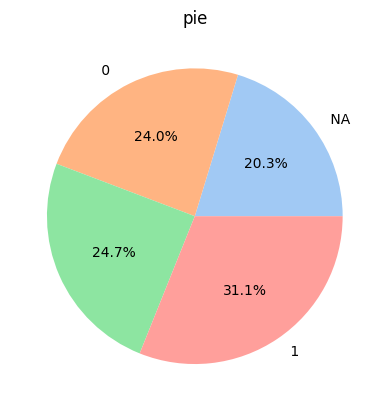

In [12]:
plt.title("pie")
colors=sns.color_palette("pastel")[0:len(money)]
plt.pie(money["MEDV"], labels=money["CHAS"], colors=colors, autopct='%1.1f%%')
plt.show()

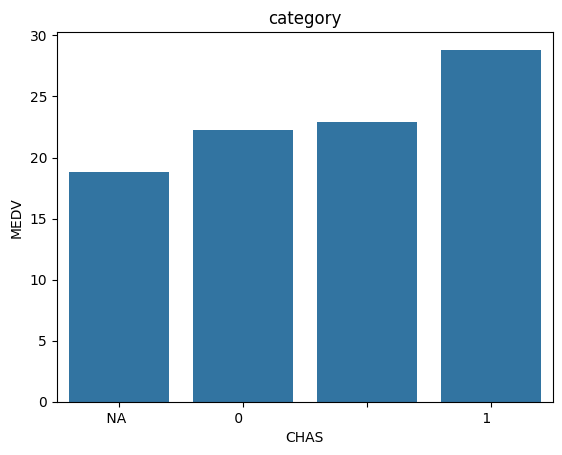

In [13]:
plt.title("category")
sns.barplot(money, x="CHAS", y="MEDV") 
plt.show()